0.9659625609711429


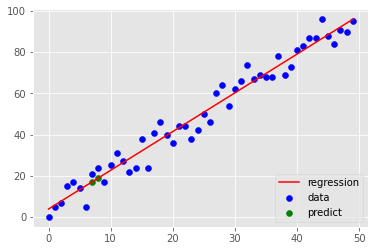

In [2]:
from statistics import mean
import numpy as np
import random

def create_dataset(hm, variance, step = 2, correlation = False):
    val = 1
    y = []
    for i in range(hm):
        v = val + random.randrange(-variance, variance)
        y.append(v)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
            
    x = [i for i in range(hm)]
    
    return np.array(x, dtype = np.float64), np.array(y, dtype = np.float64)

def linear_slope_and_intercept(x, y):
    m = mean(x) * mean(y) - mean(x * y)
    m /= mean(x) ** 2 - mean(x ** 2)
    
    b = mean(y) - m * mean(x)
    
    return m, b

def squared_error(y_orig, y_line):
    return sum((y_line - y_orig) ** 2)

def coefficient_of_determination(y_orig, y_regr):
    y_mean = [mean(y_orig) for _ in y_orig]
    sqrd_err_regr = squared_error(y_orig, y_regr)
    sqrd_err_mean = squared_error(y_orig, y_mean)
    
    return 1 - sqrd_err_regr / sqrd_err_mean

x, y = create_dataset(50, 10, 2, correlation = 'pos')

m, b = linear_slope_and_intercept(x, y)

regression_line = [m * i + b for i in x]

r_sqrd = coefficient_of_determination(y, regression_line)

print(r_sqrd)

predict_x = np.array([7, 8], dtype=np.float64)
predict_y = (m * predict_x) + b

import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

plt.scatter(x, y, color = 'blue', label = 'data')
plt.scatter(predict_x, predict_y, color = 'green', label = 'predict')
plt.plot(x, regression_line, color = 'red', label = 'regression')
plt.legend(loc = 4)
plt.show()




0.9784139427281232


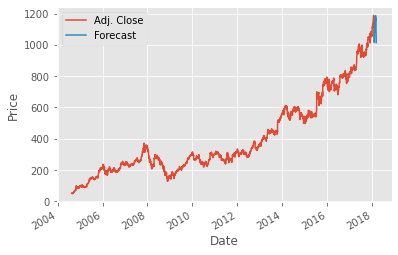

In [47]:
import quandl, math
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing, svm, neighbors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style

quandl.ApiConfig.api_key = "r1NRrfSThJSzC8SCKsmr"
df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)
y = np.array(df['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#clf = svm.SVR()
clf = LinearRegression()
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)

print(confidence)

forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
    
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=0)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [5]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, neighbors, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?',-99999, inplace=True)
df.drop(['Sample code number'], 1, inplace=True)

X = np.array(df.drop(['Class'], 1))
y = np.array(df['Class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('KNeighbors',accuracy)

clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Linear',accuracy)

for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    print('SVM-' + k,accuracy)



KNeighbors 0.9857142857142858
Linear 0.8096133504203158
SVM-linear -587.8930768216387
SVM-poly -0.4756620502645299
SVM-rbf -0.4754338623342871
SVM-sigmoid -0.4769786418929416


[[[255 242   0   0]
  [255 242   0 127]
  [ 63  72 204 255]
  [ 63  72 204 255]
  [ 63  72 204 255]
  [ 63  72 204 255]
  [255 242   0 255]
  [255 242   0 255]]

 [[255 242   0 255]
  [ 63  72 204 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [ 63  72 204 255]
  [255 242   0 255]]

 [[ 63  72 204 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [ 63  72 204 255]]

 [[ 63  72 204 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [ 63  72 204 255]]

 [[ 63  72 204 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [ 63  72 204 255]]

 [[ 63  72 204 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [255 242   0 255]
  [ 63  72 204 255]]

 [[255 242   0 255]
  [ 63  

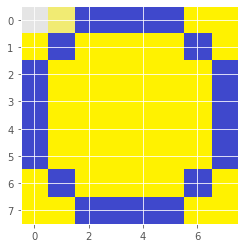

In [88]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#i = Image.open('images/dot.png')
i = Image.open('images/numbers/y0.4.png')
#i = Image.open('img.jpg')
iar = np.asarray(i).copy()
iar.setflags(write = 1)
iar[0, 0, 3] = 0
iar[0, 1, 3] = int(255/2)
print(iar)
plt.imshow(iar)
plt.show()

In [ ]:
import qiskit as q
from qiskit import IBMQ
%matplotlib inline

IBMQ.save_account(open('token.txt', 'r').read())

IBMQ.load_account()

IBMQ.providers()

provider = IBMQ.get_provider('ibm-q')

for backend in provider.backends():
	try:
		qubit_count = len(backend.properties().qubits)
	except:
		qubit_count = 'simulated'

	print(f'{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits')

from qiskit.tools.monitor import job_monitor

circuit = q.QuantumCircuit(2, 2)
circuit.x(0)
circuit.cx(0, 1)
circuit.measure([0, 1], [0, 1])
circuit.draw()
#circuit.draw(output='mpl')

backend = provider.get_backend('ibmq_london')

job = q.execute(circuit, backend = backend, shots = 500)

configrc.store_credentials:WARNING:2020-05-09 02:25:20,823: Credentials already present. Set overwrite=True to overwrite.


ibmq_qasm_simulator has 1 queued and simulated qubits
ibmqx2 has 25 queued and 5 qubits
ibmq_16_melbourne has 17 queued and 15 qubits
ibmq_vigo has 1 queued and 5 qubits
ibmq_ourense has 0 queued and 5 qubits
ibmq_london has 2 queued and 5 qubits
ibmq_burlington has 1 queued and 5 qubits


[2.6666666666666665, 4] [0.6666666666666666, 1] 1.3333333333333335 2.6666666666666665


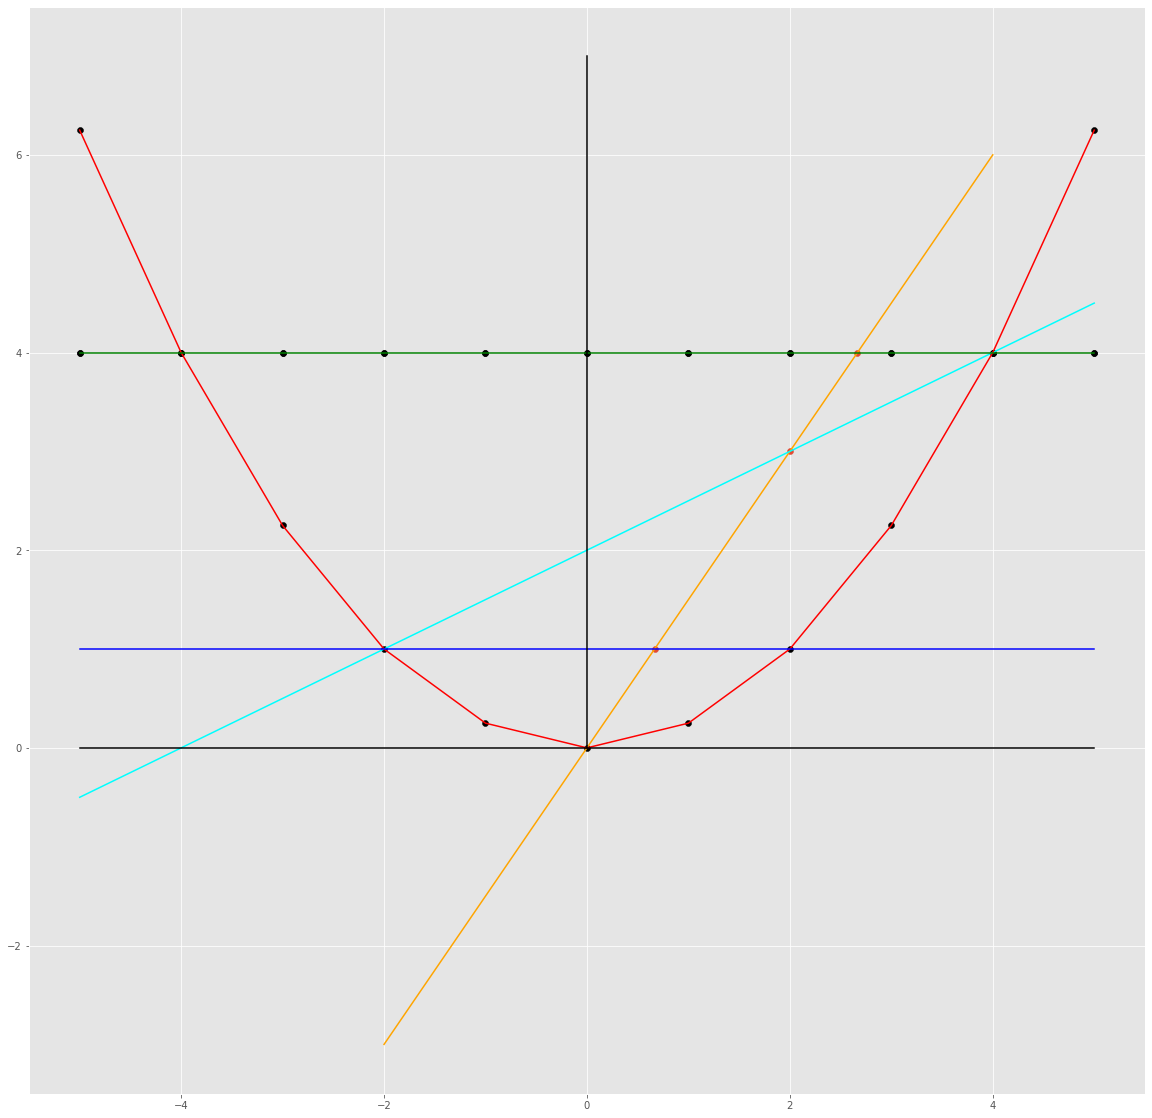

In [95]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.rcParams['figure.figsize'] = [20, 20]


def y2(x):
    return 4

def y3(x):
    return 1

def y1(a, x):
    return a * (x ** 2)

def line(x, a, b):
    y = a * x + b
    return y
    
def a(p):
    y = p[1]
    x = p[0]
    return y / (x ** 2)

A = [-4, 4]
B = [4, 4]
C = [-2, 1]

a_ = 3/2
P = [4/a_, 4]
Q = [1/a_, 1]
R = [2, 3]

BP = 4 - 4/a_
CQ = 2 + 1/a_

print(P, Q, BP, CQ)

x = [i for i in range(-5, 6)]

plt.plot([j for j in range(-2,5)], [line(i, a_, 0) for i in range(-2, 5)], color = 'orange', label = 'PRQ')
plt.plot(x, [line(i, 1/2, 2) for i in x], color = 'cyan', label = 'y1')
plt.plot(x, [y1(0.25, i) for i in x], color = 'red', label = 'y1')
plt.plot(x, [y2(i) for i in x], color = 'green', label = 'y2')
plt.plot(x, [y3(i) for i in x], color = 'blue', label = 'y3')
plt.scatter(x, [y1(0.25, i) for i in x], color = 'black', label = 'point')
plt.scatter(x, [y2(i) for i in x], color = 'black', label = 'point')
plt.plot(x, [0 for _ in x], color = 'black', label = 'x')
plt.plot([0 for _ in range(8)], [i for i in range(8)], color = 'black', label = 'y')
plt.scatter(x, [y2(i) for i in x], color = 'black', label = 'point')
plt.scatter([P[0], Q[0], R[0]], [P[1], Q[1], R[1]])


#plt.legend(loc = 4)
plt.show()



0.125


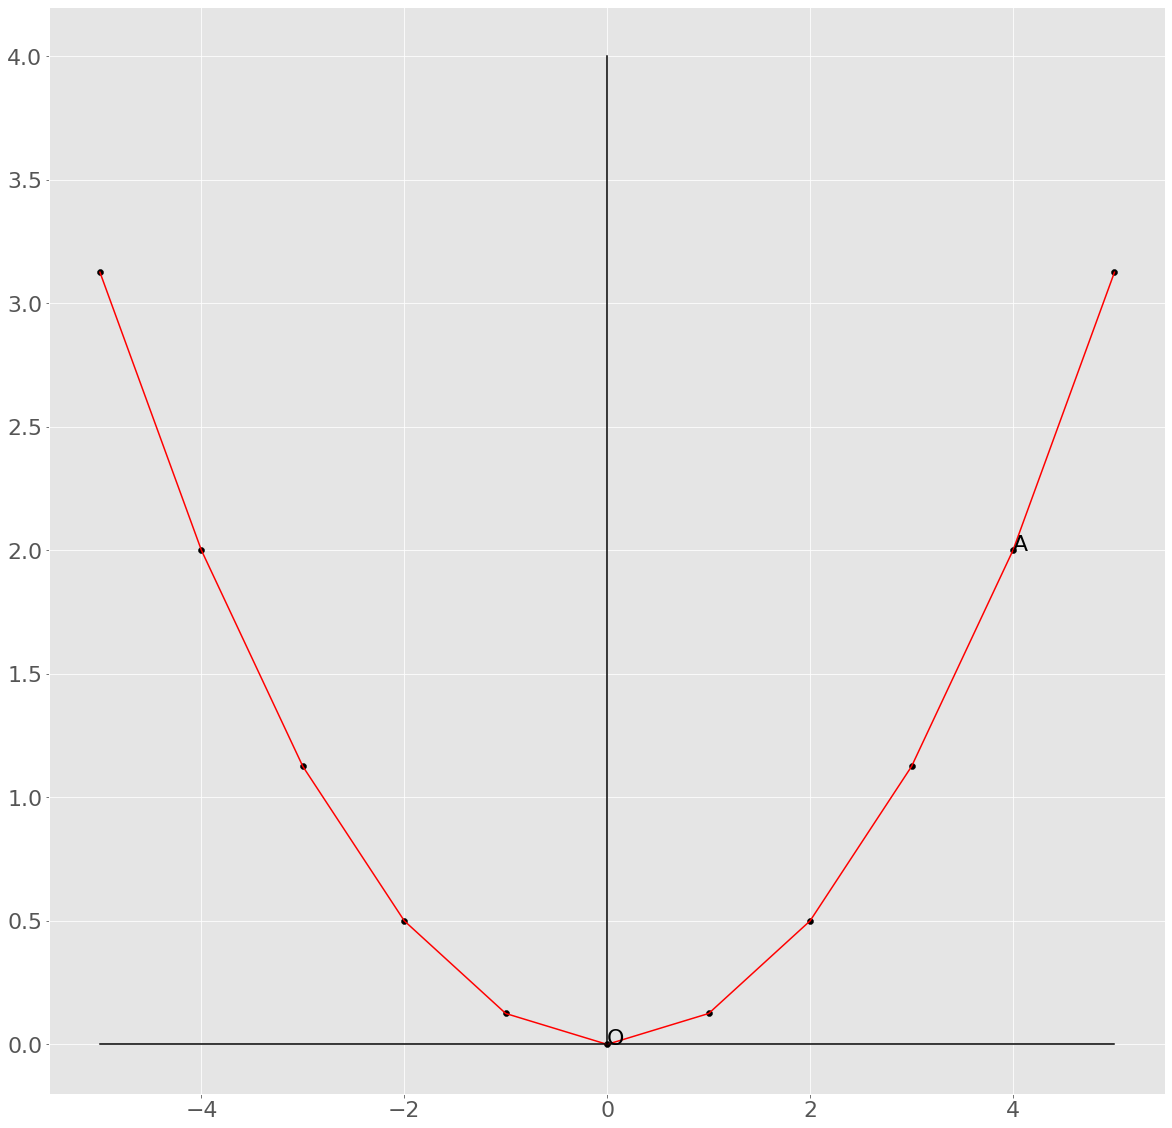

In [97]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

style.use('ggplot')
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams.update({'font.size': 22})

def line(x, a, b):
    y = a * x + b
    return y

def y(a, x):
    return a * (x ** 2)

def a(p):
    y = p[1]
    x = p[0]
    return y / (x ** 2)

O = [0, 0]
A = [4, 2]
print(a(A))
B = [0, 5]

a_ = -2
b = 5
x1 = [0, 1, 2, 3]

x = [i for i in range(-5, 6)]

#plt.plot(x1, [line(i, a_, b) for i in x1], color = 'green')
#plt.plot([O[0], A[0], B[0]], [O[1], A[1], B[1]], color = 'blue')
#plt.scatter([B[0]], [B[1]], color = 'black', label = 'point')
plt.scatter(x, [y(a(A), i) for i in x], color = 'black', label = 'point')
plt.plot(x, [y(a(A), i) for i in x], color = 'red', label = 'y')
plt.annotate('A', A)
plt.plot(x, [0 for _ in x], color = 'black', label = 'x')
plt.plot([0 for _ in range(5)], [i for i in range(5)], color = 'black', label = 'y')
plt.annotate('O', (0, 0))
plt.show()






In [2]:
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(2, 2)
circuit.x(0)
circuit.cx(0, 1)
circuit.measure([0, 1], [0, 1])
circuit.draw()
#circuit.draw(output='mpl')

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═